In [1]:
import math
import datetime
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
import matplotlib.pylab as plot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline
plot.rcParams['figure.figsize']=(20,10)
plot.style.use('ggplot')

In [3]:
sales_data = pd.read_csv('./lithium.csv')
sales_data['Date']=pd.to_datetime(sales_data['Date'])

resource_data = sales_data[['Date','economic_resources']]
mining_data = sales_data[['Date','mine_production']]

sales_data.head()

,Date,economic_resources,mine_production
0,1990-01-01,2210,5.5
1,1995-01-01,2200,6.3
2,2000-01-01,3400,13.3
3,2001-01-01,3403,14.6
4,2002-01-01,4110,15.1


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Kilo Tons Li')]

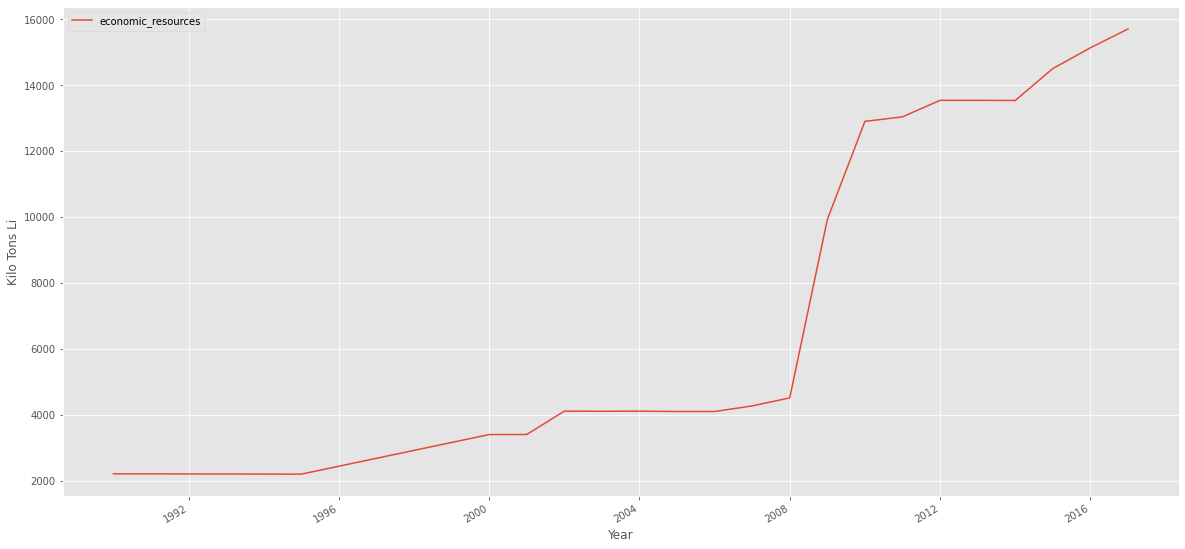

In [4]:
resource_data.set_index('Date','Kt Li', inplace=True)
graph1 = resource_data.plot()
graph1.set(xlabel="Year", ylabel="Kilo Tons Li")

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Kilo Tons Li')]

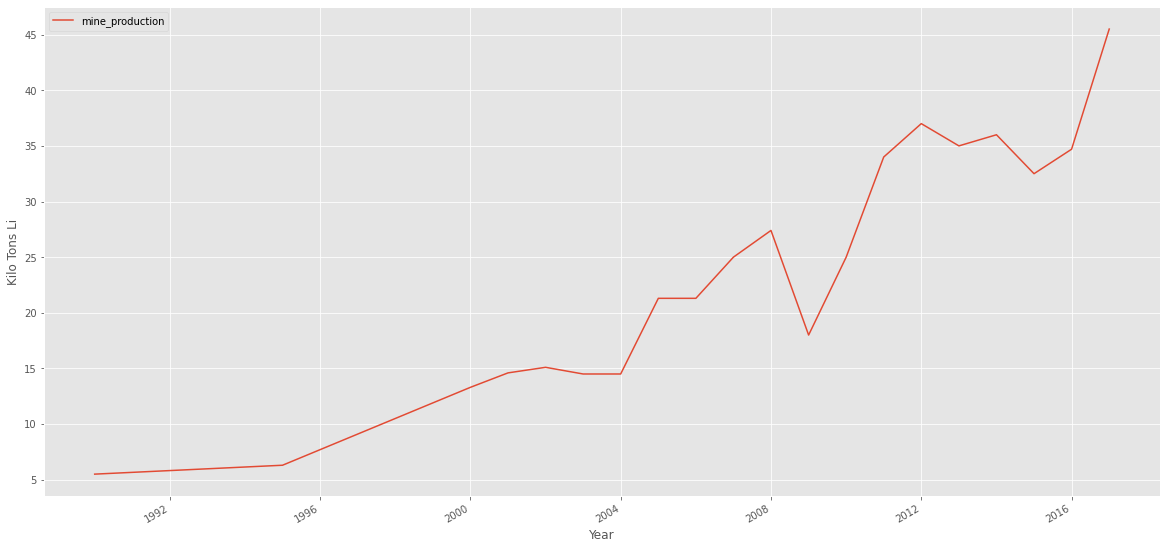

In [5]:
mining_data.set_index('Date', inplace=True)
graph2 = mining_data.plot()
graph2.set(xlabel="Year", ylabel="Kilo Tons Li")

In [6]:
df = pd.read_csv (r'./lithium.csv')
df['Date']=pd.to_datetime(sales_data['Date'])
df.set_index('Date', inplace=True)
df.head()

,economic_resources,mine_production
Date,,
1990-01-01,2210,5.5
1995-01-01,2200,6.3
2000-01-01,3400,13.3
2001-01-01,3403,14.6
2002-01-01,4110,15.1


In [7]:
forecast_col1 = 'economic_resources'
forecast_col2 = 'mine_production'

In [8]:
df1=df[['economic_resources','mine_production']]
df1.fillna(value=-99999, inplace=True)

df1.head()

,economic_resources,mine_production
Date,,
1990-01-01,2210,5.5
1995-01-01,2200,6.3
2000-01-01,3400,13.3
2001-01-01,3403,14.6
2002-01-01,4110,15.1


In [9]:
forecast_out = int(math.ceil(0.2 * len(df)))

print(forecast_out)

4


In [10]:
df1['label'] = df1[forecast_col1].shift(-forecast_out)

df1.tail()

,economic_resources,mine_production,label
Date,,,
2013-01-01,13538,35.0,15700.0
2014-01-01,13533,36.0,NaN
2015-01-01,14500,32.5,NaN
2016-01-01,15130,34.7,NaN
2017-01-01,15700,45.5,NaN


In [11]:
X1 = np.array(df1.drop(['label'], 1))
X1 = preprocessing.scale(X1)
X1_lately = X1[-forecast_out:]
X1 = X1[:-forecast_out]

print(X1)

[[-1.17132071 -1.68530509]
 [-1.1733039  -1.61173106]
 [-0.93532128 -0.96795831]
 [-0.93472632 -0.84840051]
 [-0.79451489 -0.80241675]
 [-0.79510985 -0.85759727]
 [-0.79451489 -0.85759727]
 [-0.79649808 -0.23221803]
 [-0.79649808 -0.23221803]
 [-0.7629822   0.10806185]
 [-0.71439408  0.32878394]
 [ 0.35910586 -0.53571089]
 [ 0.9487078   0.10806185]
 [ 0.97567916  0.93576967]
 [ 1.07523522  1.21167228]
 [ 1.07523522  1.02773721]]


In [12]:
df1.dropna(inplace=True)

df1.head()
df1.tail()

,economic_resources,mine_production,label
Date,,,
2009-01-01,9927,18.0,13538.0
2010-01-01,12900,25.0,13533.0
2011-01-01,13036,34.0,14500.0
2012-01-01,13538,37.0,15130.0
2013-01-01,13538,35.0,15700.0


In [13]:
y1 = np.array(df1['label'])

print(y1)

[ 4110.  4107.  4110.  4100.  4100.  4269.  4514.  9927. 12900. 13036.
 13538. 13538. 13533. 14500. 15130. 15700.]


In [14]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1)

In [15]:
clf1 = LinearRegression(n_jobs=-1)
clf1.fit(X1_train, y1_train)
confidence1 = clf1.score(X1_test, y1_test)

print(confidence1)

0.781283327187593


In [16]:
forecast_set1 = clf1.predict(X1_lately)
df1['Forecast'] = np.nan

df1.head()

,economic_resources,mine_production,label,Forecast
Date,,,,
1990-01-01,2210,5.5,4110.0,NaN
1995-01-01,2200,6.3,4107.0,NaN
2000-01-01,3400,13.3,4110.0,NaN
2001-01-01,3403,14.6,4100.0,NaN
2002-01-01,4110,15.1,4100.0,NaN


In [17]:
last_date = df1.iloc[-1].name
print(last_date)
last_unix = last_date.timestamp()
print(datetime.datetime.fromtimestamp(last_unix))
one_day = 86400
next_unix = last_unix

for i in forecast_set1:
    next_unix += (86400*366)
    next_date = datetime.datetime.fromtimestamp(next_unix)
    df1.loc[next_date] = [np.nan for _ in range(len(df1.columns)-1)]+[i]

df1.tail()

2013-01-01 00:00:00
2013-01-01 05:30:00


,economic_resources,mine_production,label,Forecast
Date,,,,
2013-01-01 00:00:00,13538.0,35.0,15700.0,NaN
2014-01-02 05:30:00,NaN,NaN,NaN,17690.081869
2015-01-03 05:30:00,NaN,NaN,NaN,16298.822763
2016-01-04 05:30:00,NaN,NaN,NaN,17393.576234
2017-01-04 05:30:00,NaN,NaN,NaN,22318.949829


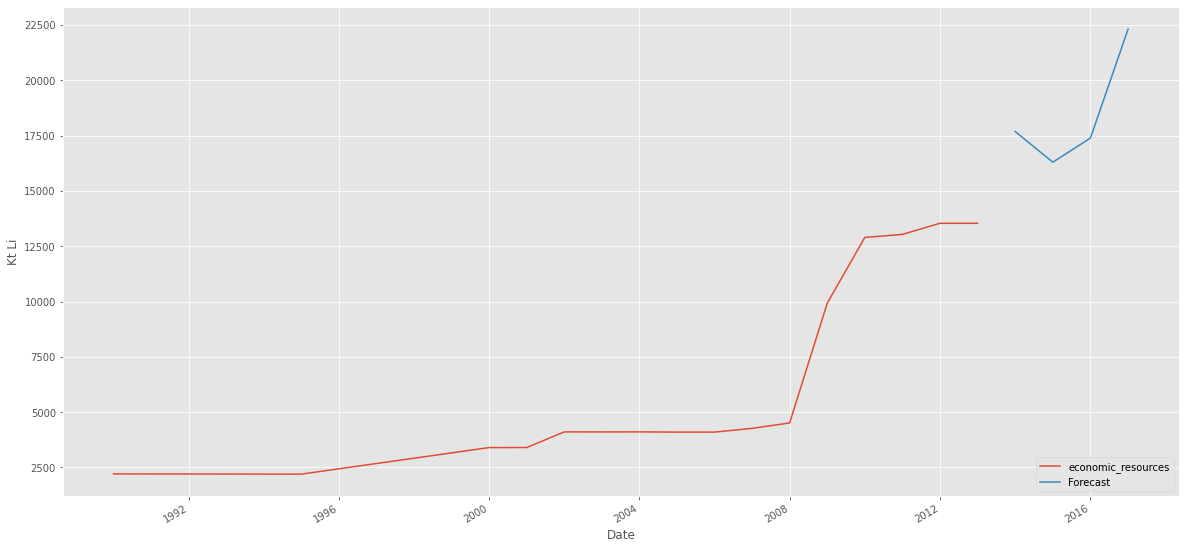

In [18]:
df1[forecast_col1].plot()
df1['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Kt Li')
plt.show()

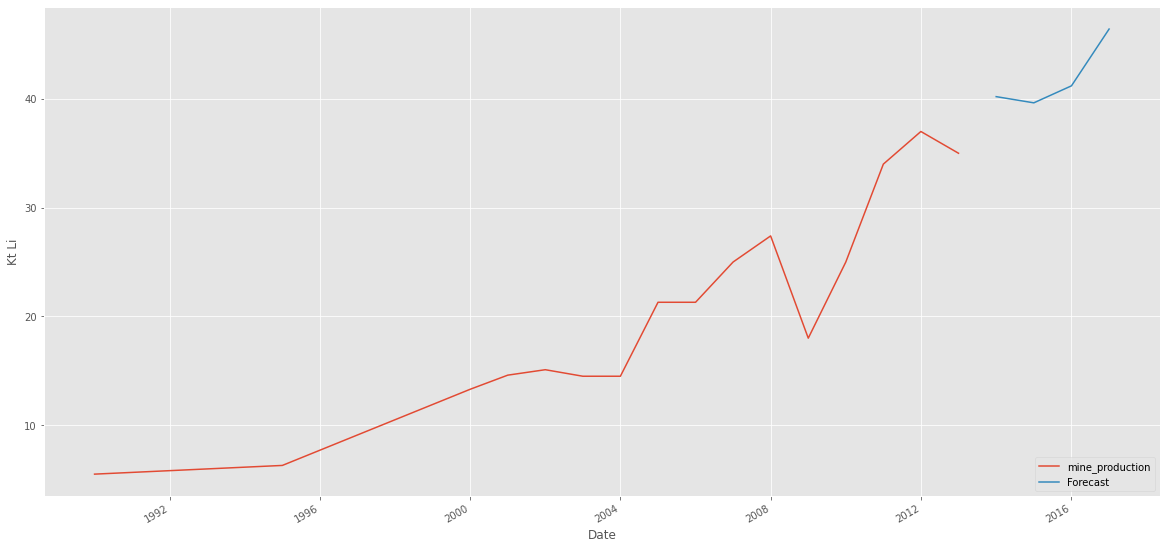

In [19]:
df2=df[['economic_resources','mine_production']]
df2.fillna(value=-99999, inplace=True)

df2['label'] = df2[forecast_col2].shift(-forecast_out)

X2 = np.array(df2.drop(['label'], 1))
X2 = preprocessing.scale(X2)
X2_lately = X2[-forecast_out:]
X2 = X2[:-forecast_out]
df2.dropna(inplace=True)

y2 = np.array(df2['label'])

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1)

clf2 = LinearRegression(n_jobs=-1)
clf2.fit(X2_train, y2_train)
confidence = clf2.score(X2_test, y2_test)

forecast_set2 = clf2.predict(X2_lately)
df2['Forecast'] = np.nan

last_date = df2.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix

for i in forecast_set2:
    next_unix += (86400*366)
    next_date = datetime.datetime.fromtimestamp(next_unix)
    df2.loc[next_date] = [np.nan for _ in range(len(df2.columns)-1)]+[i]

df2[forecast_col2].plot()
df2['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Kt Li')
plt.show()

In [20]:
print("completed")

completed
